<a href="https://colab.research.google.com/github/davidashirov/fast-ai-course/blob/main/MNIST_analysis_with_average_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It's time to make an analysis for classic MNIST handwritten digits dataset.

In [6]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import os

In [17]:
# Import data from fast ai using untar_data
path = untar_data(URLs.MNIST)

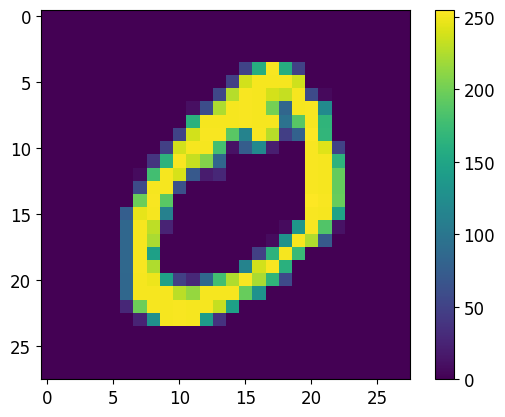

In [21]:
sample_image = Image.open( (path/'training'/'0').ls().sorted()[0] )

cmap = plt.get_cmap('viridis')
plt.imshow(sample_image)
plt.set_cmap(cmap)
plt.colorbar()
plt.show()

In [81]:
def load_ims(dset):
  subdir = 'training' if dset=='train' else 'testing'
  ims = {}
  for i in range(10):
    ims[i] = (path/subdir/str(i)).ls().sorted()
  return ims

def im_to_tensor(im):
  t = tensor(im, dtype=torch.float32) / 255
  return t

def ims_to_tensors(ims):
  tensors_dict = {}
  for k in ims:
    # For each digit open each image it contains and turn into a tensor, then stack all of them
    v = torch.stack([im_to_tensor(Image.open(im_path)) for im_path in ims[k]])
    tensors_dict[k] = v  # Normalize the values in each image from 0 to 1
  return tensors_dict

train_ims_dict = load_ims('train')
valid_ims_dict = load_ims('valid')
train_tensor_dict = ims_to_tensors(train_ims_dict)
valid_tensor_dict = ims_to_tensors(valid_ims_dict)

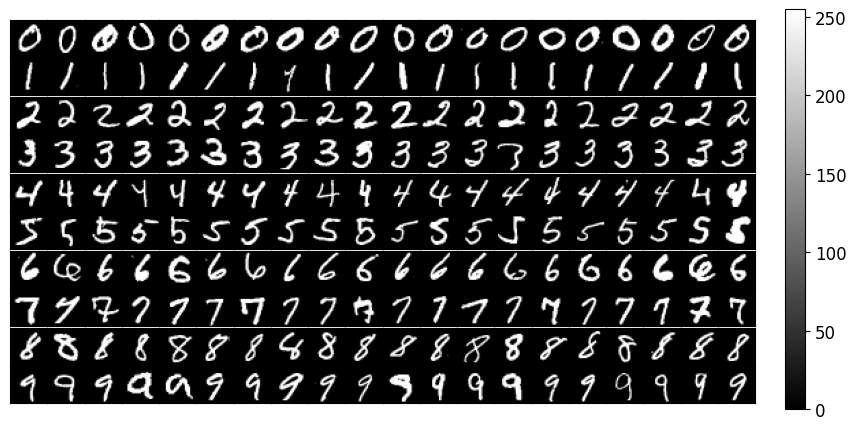

In [82]:
fig, axes = plt.subplots(ncols=20, nrows=10, sharex=False, sharey=True, figsize=(10, 5))
for digit in range(10):
  for i in range(20):
    im = axes[digit, i].imshow(Image.open(train_ims_dict[digit][i]), cmap='gray')
    axes[digit, i].get_xaxis().set_visible(False)
    axes[digit, i].get_yaxis().set_visible(False)

cbar_ax = fig.add_axes([0.9, 0.10, 0.02, 0.8])
fig.colorbar(im, cax=cbar_ax)
plt.subplots_adjust(wspace=0, hspace=0, right=0.87)
plt.margins(0)
plt.show()

In [83]:
def avg_images(im_tensors):
  '''
  Averages all images for each category in im_tensors.
  im_tensors: dictionary of category:tensors
  '''
  avg_im_tensors = {}
  for k in im_tensors:
    avg_im_tensors[k] = im_tensors[k].mean(0)
  return avg_im_tensors

avg_train_tensors = avg_images(train_tensor_dict)

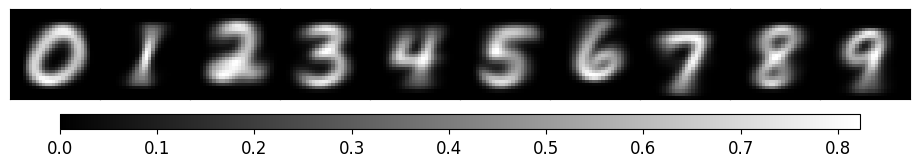

In [84]:
# Plot avg images for each category
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(10, 1.5))
for digit in range(10):
  im = axes[digit].imshow(avg_train_tensors[digit], cmap='gray')
  axes[digit].get_xaxis().set_visible(False)
  axes[digit].get_yaxis().set_visible(False)
plt.subplots_adjust(left=0, right=0.9, top=1, bottom=0, wspace=0, hspace=0)
cbar_ax = fig.add_axes([0.05, 0.0, 0.8, 0.1])
fig.colorbar(im, cax=cbar_ax,location="bottom")
plt.show()

In [207]:
def l1_norm(t1, t2):
  assert t1.max() <= 1 and t2.max() <= 1, 'Normalize image from 0 to 1 before calculating norm'
  norm = (t1 - t2).abs().mean((-1,-2))
  return norm

def l2_norm(t1, t2):
  assert t1.max() <= 1 and t2.max() <= 1, 'Normalize image from 0 to 1 before calculating norm'
  norm = (t1 - t2).square().mean((-1,-2)).sqrt()
  return norm

def predict(t):
  norms = []
  for cat in range(10):
    l1 = l1_norm(avg_train_tensors[cat], t)
    l2 = l2_norm(avg_train_tensors[cat], t)
    norms.append(l2)
  return torch.stack(norms).argmin(0)

In [208]:
import random
true_cat =  random.randint(0, 9)
im_number = random.randint(0, 1000)
im = (path/'training'/str(true_cat)).ls().sorted()[random.randint(0, 1000)]

for cat in range(10):
  l1 = l1_norm(avg_train_tensors[cat], im_to_tensor(Image.open(im))).item()
  l2 = l2_norm(avg_train_tensors[cat], im_to_tensor(Image.open(im))).item()
  print(f'{cat}: {l1=}, {l2=},{1/l2=}')

predicted_cat = predict(im_to_tensor(Image.open(im))).item()
print(f'{im_number=}, {true_cat=}, {predicted_cat=}')
#plt.imshow(Image.open(im))

0: l1=0.19208557903766632, l2=0.32457268238067627,1/l2=3.080974013786984
1: l1=0.11093081533908844, l2=0.2592335343360901,1/l2=3.857525618979232
2: l1=0.16146574914455414, l2=0.2797984480857849,1/l2=3.5740012385394095
3: l1=0.14806793630123138, l2=0.2670898139476776,1/l2=3.7440589186823057
4: l1=0.11622792482376099, l2=0.22138068079948425,1/l2=4.5171059931184825
5: l1=0.13609592616558075, l2=0.24231527745723724,1/l2=4.126854940776385
6: l1=0.1499861627817154, l2=0.2780270576477051,1/l2=3.5967722295112896
7: l1=0.10040818154811859, l2=0.2015448361635208,1/l2=4.961675124182605
8: l1=0.12982124090194702, l2=0.23387277126312256,1/l2=4.275829095448366
9: l1=0.09876284003257751, l2=0.1922532618045807,1/l2=5.201472217498542
im_number=897, true_cat=9, predicted_cat=9


In [ ]:
def accuracy()

In [218]:
train_tensor_dict[cat].size()[0]

predict(train_tensor_dict[9]).eq(9).sum() / train_tensor_dict[cat].size()[0]

tensor(0.7766)

In [239]:
def accuracy(t):
  accuracies_cat = []
  n_samples = []
  n_corr_results = []
  for cat in range(10):
    sample_tensor = t[cat]
    n_samples_cat = sample_tensor.size()[0]
    predicted_cats = predict(t[cat])
    correctly_predicted_cats = predicted_cats.eq(cat).sum()
    accuracy_cat = (correctly_predicted_cats/n_samples_cat).item()

    n_samples.append(n_samples_cat)
    n_corr_results.append(correctly_predicted_cats)
    accuracies_cat.append(accuracy_cat)
  total_accuracy = (sum(n_corr_results)/sum(n_samples)).item()
  return total_accuracy, accuracies_cat

total_accuracy, accuracies = accuracy(train_tensor_dict)
print(f'{total_accuracy=}')
for cat in range(10):
  print(f'{cat} accuracy: {accuracies[cat]}')

total_accuracy=0.8079833388328552
0 accuracy: 0.8667904734611511
1 accuracy: 0.9618807435035706
2 accuracy: 0.7579724788665771
3 accuracy: 0.7700212001800537
4 accuracy: 0.8082848191261292
5 accuracy: 0.6705405116081238
6 accuracy: 0.8680297136306763
7 accuracy: 0.8407022953033447
8 accuracy: 0.725004255771637
9 accuracy: 0.7766011357307434
